# 1 - Perkenalan
Nama : Nurul Izzah

Dataset : Dataset ini berasal dari BigQuery dengan nama bigquery-public-data.thelook_ecommerce

Objective : menganalisis permasalahan Shipping dan Stock performance pada Q1 dan Q2 di tahun 2023



# 2 - Import Libraries

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
!pip install feature-engine

from feature_engine.outliers import Winsorizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 4.4 MB/s eta 0:00:00


# 3 - Data Loading

In [ ]:
# import data from Gdrive
dist_centers = pd.read_csv('/content/drive/MyDrive/bq-results-20230722-073425-1690011271176/distribution_centers.csv')
invent_items = pd.read_csv('/content/drive/MyDrive/bq-results-20230722-072607-1690010812120/inventory_items.csv')
order_items = pd.read_csv('/content/drive/MyDrive/bq-results-20230722-072757-1690010887214/order_items.csv')
products = pd.read_csv('/content/drive/MyDrive/bq-results-20230722-073103-1690011079630/products.csv')
orders = pd.read_csv('/content/drive/MyDrive/bq-results-20230722-073519-1690011351105/orders.csv')

In [ ]:
# Show data
dist_centers

,id,name,latitude,longitude
0,1,Memphis TN,35.1174,-89.9711
1,2,Chicago IL,41.8369,-87.6847
2,3,Houston TX,29.7604,-95.3698
3,4,Los Angeles CA,34.0500,-118.2500
4,5,New Orleans LA,29.9500,-90.0667
5,6,Port Authority of New York/New Jersey NY/NJ,40.6340,-73.7834
6,7,Philadelphia PA,39.9500,-75.1667
7,8,Mobile AL,30.6944,-88.0431
8,9,Charleston SC,32.7833,-79.9333
9,10,Savannah GA,32.0167,-81.1167


In [ ]:
# Show data
invent_items

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,232870,16898,2023-02-28 18:19:00 UTC,NaN,13.925000,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.000000,Men,22811EE19846217512507785E74D12CC,3
1,298086,16898,2023-06-26 12:09:00 UTC,NaN,13.925000,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.000000,Men,22811EE19846217512507785E74D12CC,3
2,448142,16898,2023-05-05 02:20:23 UTC,2023-06-15 07:39:23 UTC,13.925000,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.000000,Men,22811EE19846217512507785E74D12CC,3
3,82620,9482,2023-01-26 17:49:19 UTC,2023-03-17 08:47:19 UTC,5.712000,Socks & Hosiery,KEEN Women Bellingham Low Ultralite Sock,NaN,16.000000,Women,C5A3C867A3DFB776552DCFC804D4937E,3
4,234878,9482,2023-01-20 18:55:02 UTC,2023-01-27 13:46:02 UTC,5.712000,Socks & Hosiery,KEEN Women Bellingham Low Ultralite Sock,NaN,16.000000,Women,C5A3C867A3DFB776552DCFC804D4937E,3
...,...,...,...,...,...,...,...,...,...,...,...,...
102905,115692,14392,2023-04-24 02:33:06 UTC,2023-06-23 01:55:06 UTC,15.752521,Maternity,La Leche League International Pullover Nursing...,La Leche League Sports Nurising Bra White,35.720001,Women,625D2D3101C23C47A46984741C232FED,9
102906,116123,14392,2023-06-18 13:28:11 UTC,2023-07-17 12:27:11 UTC,15.752521,Maternity,La Leche League International Pullover Nursing...,La Leche League Sports Nurising Bra White,35.720001,Women,625D2D3101C23C47A46984741C232FED,9
102907,143618,14392,2023-03-04 10:09:00 UTC,NaN,15.752521,Maternity,La Leche League International Pullover Nursing...,La Leche League Sports Nurising Bra White,35.720001,Women,625D2D3101C23C47A46984741C232FED,9
102908,356707,14392,2023-04-22 08:01:30 UTC,2023-05-19 07:10:30 UTC,15.752521,Maternity,La Leche League International Pullover Nursing...,La Leche League Sports Nurising Bra White,35.720001,Women,625D2D3101C23C47A46984741C232FED,9


In [ ]:
# Show data
order_items

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,9122,6334,5079,13606,24679,Processing,2023-06-08 14:04:57 UTC,NaN,NaN,NaN,2.50
1,92682,64055,51455,28951,250435,Complete,2023-06-18 17:30:04 UTC,2023-06-20 14:12:00 UTC,2023-06-25 11:08:00 UTC,NaN,3.00
2,162361,112232,89895,28557,438342,Shipped,2023-06-22 12:16:09 UTC,2023-06-22 20:27:00 UTC,NaN,NaN,3.25
3,146871,101446,81378,28557,396491,Complete,2023-06-04 04:51:38 UTC,2023-06-06 12:04:00 UTC,2023-06-08 17:49:00 UTC,NaN,3.25
4,91698,63392,50944,28557,247793,Cancelled,2023-03-06 02:52:29 UTC,NaN,NaN,NaN,3.25
...,...,...,...,...,...,...,...,...,...,...,...
54631,93265,64446,51744,417,252019,Cancelled,2023-04-27 06:04:46 UTC,NaN,NaN,NaN,8.82
54632,91916,63545,51058,184,248386,Processing,2023-01-08 03:33:56 UTC,NaN,NaN,NaN,8.82
54633,47511,32868,26385,3633,128367,Shipped,2023-06-11 09:34:19 UTC,2023-06-07 13:58:00 UTC,NaN,NaN,9.32
54634,116215,80220,64366,146,313912,Cancelled,2023-03-17 03:35:16 UTC,NaN,NaN,NaN,9.32


In [ ]:
# Show data
products

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,27569,92.652563,Swim,2XU Men's Swimmers Compression Long Sleeve Top,2XU,150.410004,Men,B23C5765E165D83AA924FA8F13C05F25,1
1,27445,24.719661,Swim,TYR Sport Men's Square Leg Short Swim Suit,TYR,38.990002,Men,2AB7D3B23574C3DEA2BD278AFD0939AB,1
2,27457,15.897600,Swim,TYR Sport Men's Solid Durafast Jammer Swim Suit,TYR,27.600000,Men,8F831227B0EB6C6D09A0555531365933,1
3,27466,17.850000,Swim,TYR Sport Men's Swim Short/Resistance Short Sw...,TYR,30.000000,Men,67317D6DCC4CB778AEB9219565F5456B,1
4,27481,29.408001,Swim,TYR Alliance Team Splice Jammer,TYR,45.950001,Men,213C888198806EF1A0E2BBF2F4855C6C,1
...,...,...,...,...,...,...,...,...,...
29115,1993,22.150999,Fashion Hoodies & Sweatshirts,Comfort Colors C1598 Womens Full-Zip Hooded Fl...,Comfort Colors,52.119999,Women,C5A4E7E6882845EA7BB4D9462868219B,10
29116,2062,18.973360,Fashion Hoodies & Sweatshirts,Comfort Colors Pigment-Dyed Ladies Full-Zip Ho...,Comfort Colors,39.860001,Women,2D405B367158E3F12D7C1E31A96B3AF3,10
29117,2308,9.028020,Fashion Hoodies & Sweatshirts,Comfort Colors by Chouinard Women's Drawstring...,Comfort Colors,18.020000,Women,E58AEA67B01FA747687F038DFDE066F6,10
29118,1852,17.674240,Fashion Hoodies & Sweatshirts,DV by Dolce Vita Women's Larisa Hooded Sweatshirt,DV by Dolce Vita,34.520000,Women,EB1E78328C46506B46A4AC4A1E378B91,10


In [ ]:
# Show data
orders

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,23,17,Shipped,F,2023-06-09 15:06:00 UTC,NaN,2023-06-11 06:19:00 UTC,NaN,1
1,75,57,Shipped,F,2023-02-22 11:33:00 UTC,NaN,2023-02-25 04:31:00 UTC,NaN,1
2,87,73,Shipped,F,2023-05-22 07:09:00 UTC,NaN,2023-05-23 01:46:00 UTC,NaN,1
3,120,99,Shipped,F,2023-03-04 15:23:00 UTC,NaN,2023-03-06 10:02:00 UTC,NaN,1
4,123,100,Shipped,F,2023-06-09 09:23:00 UTC,NaN,2023-06-11 16:59:00 UTC,NaN,1
...,...,...,...,...,...,...,...,...,...
37747,124580,99784,Processing,M,2023-01-11 02:21:00 UTC,NaN,NaN,NaN,4
37748,124581,99784,Processing,M,2023-02-25 02:21:00 UTC,NaN,NaN,NaN,1
37749,124621,99817,Processing,M,2023-05-24 14:17:00 UTC,NaN,NaN,NaN,1
37750,124795,99948,Processing,M,2023-05-16 10:44:00 UTC,NaN,NaN,NaN,2


In [ ]:
# duplicate data
dist_centers_copy = dist_centers.copy()
invent_items_copy = invent_items.copy()
order_items_copy = order_items.copy()
products_copy = products.copy()
orders_copy = orders.copy()

In [ ]:
# view data types
dist_centers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         10 non-null     int64  
 1   name       10 non-null     object 
 2   latitude   10 non-null     float64
 3   longitude  10 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 448.0+ bytes


In [ ]:
# view data types
invent_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102910 entries, 0 to 102909
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102910 non-null  int64  
 1   product_id                      102910 non-null  int64  
 2   created_at                      102910 non-null  object 
 3   sold_at                         60052 non-null   object 
 4   cost                            102910 non-null  float64
 5   product_category                102910 non-null  object 
 6   product_name                    102903 non-null  object 
 7   product_brand                   102818 non-null  object 
 8   product_retail_price            102910 non-null  float64
 9   product_department              102910 non-null  object 
 10  product_sku                     102910 non-null  object 
 11  product_distribution_center_id  102910 non-null  int64  
dtypes: float64(2), i

In [ ]:
# view data types
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54636 entries, 0 to 54635
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 54636 non-null  int64  
 1   order_id           54636 non-null  int64  
 2   user_id            54636 non-null  int64  
 3   product_id         54636 non-null  int64  
 4   inventory_item_id  54636 non-null  int64  
 5   status             54636 non-null  object 
 6   created_at         54636 non-null  object 
 7   shipped_at         35285 non-null  object 
 8   delivered_at       19072 non-null  object 
 9   returned_at        5644 non-null   object 
 10  sale_price         54636 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 4.6+ MB


In [ ]:
# view data types
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29120 entries, 0 to 29119
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      29120 non-null  int64  
 1   cost                    29120 non-null  float64
 2   category                29120 non-null  object 
 3   name                    29118 non-null  object 
 4   brand                   29096 non-null  object 
 5   retail_price            29120 non-null  float64
 6   department              29120 non-null  object 
 7   sku                     29120 non-null  object 
 8   distribution_center_id  29120 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [ ]:
# view data types
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37752 entries, 0 to 37751
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      37752 non-null  int64 
 1   user_id       37752 non-null  int64 
 2   status        37752 non-null  object
 3   gender        37752 non-null  object
 4   created_at    37752 non-null  object
 5   returned_at   3895 non-null   object
 6   shipped_at    24331 non-null  object
 7   delivered_at  13265 non-null  object
 8   num_of_item   37752 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


In [ ]:
# view the top 10 invetory items data
invent_items.head(10)

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,232870,16898,2023-02-28 18:19:00 UTC,NaN,13.9250,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.00,Men,22811EE19846217512507785E74D12CC,3
1,298086,16898,2023-06-26 12:09:00 UTC,NaN,13.9250,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.00,Men,22811EE19846217512507785E74D12CC,3
2,448142,16898,2023-05-05 02:20:23 UTC,2023-06-15 07:39:23 UTC,13.9250,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.00,Men,22811EE19846217512507785E74D12CC,3
3,82620,9482,2023-01-26 17:49:19 UTC,2023-03-17 08:47:19 UTC,5.7120,Socks & Hosiery,KEEN Women Bellingham Low Ultralite Sock,NaN,16.00,Women,C5A3C867A3DFB776552DCFC804D4937E,3
4,234878,9482,2023-01-20 18:55:02 UTC,2023-01-27 13:46:02 UTC,5.7120,Socks & Hosiery,KEEN Women Bellingham Low Ultralite Sock,NaN,16.00,Women,C5A3C867A3DFB776552DCFC804D4937E,3
5,375644,9482,2023-01-30 23:25:22 UTC,2023-02-22 07:37:22 UTC,5.7120,Socks & Hosiery,KEEN Women Bellingham Low Ultralite Sock,NaN,16.00,Women,C5A3C867A3DFB776552DCFC804D4937E,3
6,70916,13863,2023-06-05 16:03:00 UTC,NaN,9.5545,Accessories,Husky Animal Hat with Mittens,NaN,24.25,Women,7992308D89FF6B43BC197C8EF9BD934B,3
7,112135,13863,2023-01-20 17:12:00 UTC,2023-03-21 00:07:00 UTC,9.5545,Accessories,Husky Animal Hat with Mittens,NaN,24.25,Women,7992308D89FF6B43BC197C8EF9BD934B,3
8,369507,13863,2023-03-29 02:34:00 UTC,NaN,9.5545,Accessories,Husky Animal Hat with Mittens,NaN,24.25,Women,7992308D89FF6B43BC197C8EF9BD934B,3
9,443230,13863,2023-05-06 07:19:00 UTC,NaN,9.5545,Accessories,Husky Animal Hat with Mittens,NaN,24.25,Women,7992308D89FF6B43BC197C8EF9BD934B,3


In [ ]:
# view the bottom 10 Inventory Items data
invent_items.tail(10)

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
102900,243250,14581,2023-01-09 08:31:56 UTC,2023-03-06 06:56:56 UTC,10.465000,Maternity,La Leche League Wrap 'N Snap Nursing Bra (4101),La Leche League International Intimates,23.000000,Women,72CC4C5E6CBDE70AA374BF94076AD722,8
102901,254195,14581,2023-03-31 19:10:35 UTC,2023-05-19 05:47:35 UTC,10.465000,Maternity,La Leche League Wrap 'N Snap Nursing Bra (4101),La Leche League International Intimates,23.000000,Women,72CC4C5E6CBDE70AA374BF94076AD722,8
102902,326874,14581,2023-06-12 06:25:40 UTC,2023-06-30 07:49:40 UTC,10.465000,Maternity,La Leche League Wrap 'N Snap Nursing Bra (4101),La Leche League International Intimates,23.000000,Women,72CC4C5E6CBDE70AA374BF94076AD722,8
102903,398165,14581,2023-01-25 03:42:00 UTC,NaN,10.465000,Maternity,La Leche League Wrap 'N Snap Nursing Bra (4101),La Leche League International Intimates,23.000000,Women,72CC4C5E6CBDE70AA374BF94076AD722,8
102904,435859,14581,2023-06-13 04:10:00 UTC,NaN,10.465000,Maternity,La Leche League Wrap 'N Snap Nursing Bra (4101),La Leche League International Intimates,23.000000,Women,72CC4C5E6CBDE70AA374BF94076AD722,8
102905,115692,14392,2023-04-24 02:33:06 UTC,2023-06-23 01:55:06 UTC,15.752521,Maternity,La Leche League International Pullover Nursing...,La Leche League Sports Nurising Bra White,35.720001,Women,625D2D3101C23C47A46984741C232FED,9
102906,116123,14392,2023-06-18 13:28:11 UTC,2023-07-17 12:27:11 UTC,15.752521,Maternity,La Leche League International Pullover Nursing...,La Leche League Sports Nurising Bra White,35.720001,Women,625D2D3101C23C47A46984741C232FED,9
102907,143618,14392,2023-03-04 10:09:00 UTC,NaN,15.752521,Maternity,La Leche League International Pullover Nursing...,La Leche League Sports Nurising Bra White,35.720001,Women,625D2D3101C23C47A46984741C232FED,9
102908,356707,14392,2023-04-22 08:01:30 UTC,2023-05-19 07:10:30 UTC,15.752521,Maternity,La Leche League International Pullover Nursing...,La Leche League Sports Nurising Bra White,35.720001,Women,625D2D3101C23C47A46984741C232FED,9
102909,356709,14392,2023-03-25 05:04:00 UTC,NaN,15.752521,Maternity,La Leche League International Pullover Nursing...,La Leche League Sports Nurising Bra White,35.720001,Women,625D2D3101C23C47A46984741C232FED,9


In [ ]:
# view the top 10 order items data
order_items.head(10)

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,9122,6334,5079,13606,24679,Processing,2023-06-08 14:04:57 UTC,NaN,NaN,NaN,2.50
1,92682,64055,51455,28951,250435,Complete,2023-06-18 17:30:04 UTC,2023-06-20 14:12:00 UTC,2023-06-25 11:08:00 UTC,NaN,3.00
2,162361,112232,89895,28557,438342,Shipped,2023-06-22 12:16:09 UTC,2023-06-22 20:27:00 UTC,NaN,NaN,3.25
3,146871,101446,81378,28557,396491,Complete,2023-06-04 04:51:38 UTC,2023-06-06 12:04:00 UTC,2023-06-08 17:49:00 UTC,NaN,3.25
4,91698,63392,50944,28557,247793,Cancelled,2023-03-06 02:52:29 UTC,NaN,NaN,NaN,3.25
5,2733,1876,1514,13696,7377,Shipped,2023-03-04 04:32:27 UTC,2023-03-05 10:46:00 UTC,NaN,NaN,3.50
6,78509,54249,43678,28679,212213,Shipped,2023-02-06 08:00:51 UTC,2023-02-05 07:58:00 UTC,NaN,NaN,3.50
7,101398,70036,56229,15419,274077,Shipped,2023-06-20 06:07:59 UTC,2023-06-21 06:32:00 UTC,NaN,NaN,3.50
8,143692,99239,79565,15419,387849,Shipped,2023-03-03 14:22:59 UTC,2023-03-05 17:59:00 UTC,NaN,NaN,3.50
9,16859,11701,9463,15419,45590,Complete,2023-03-02 01:44:25 UTC,2023-03-03 09:23:00 UTC,2023-03-07 12:28:00 UTC,NaN,3.50


In [ ]:
# view the bottom 10 orders Items data
order_items.tail(10)

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
54626,82777,57215,46000,15592,223804,Complete,2023-01-07 14:18:15 UTC,2023-01-08 07:41:00 UTC,2023-01-12 20:02:00 UTC,NaN,8.32
54627,5843,4056,3238,6992,15765,Shipped,2023-06-01 07:38:56 UTC,2023-06-01 04:39:00 UTC,NaN,NaN,8.82
54628,152315,105203,84338,417,411212,Shipped,2023-06-20 05:48:54 UTC,2023-06-20 19:27:00 UTC,NaN,NaN,8.82
54629,24427,16908,13622,417,65993,Complete,2023-04-05 11:15:38 UTC,2023-04-05 21:12:00 UTC,2023-04-09 04:44:00 UTC,NaN,8.82
54630,64952,44932,36050,184,175470,Cancelled,2023-06-05 23:06:09 UTC,NaN,NaN,NaN,8.82
54631,93265,64446,51744,417,252019,Cancelled,2023-04-27 06:04:46 UTC,NaN,NaN,NaN,8.82
54632,91916,63545,51058,184,248386,Processing,2023-01-08 03:33:56 UTC,NaN,NaN,NaN,8.82
54633,47511,32868,26385,3633,128367,Shipped,2023-06-11 09:34:19 UTC,2023-06-07 13:58:00 UTC,NaN,NaN,9.32
54634,116215,80220,64366,146,313912,Cancelled,2023-03-17 03:35:16 UTC,NaN,NaN,NaN,9.32
54635,126699,87510,70176,3633,342123,Cancelled,2023-03-30 23:10:56 UTC,NaN,NaN,NaN,9.32


In [ ]:
# view the top 10 products data
products.head(10)

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,27569,92.652563,Swim,2XU Men's Swimmers Compression Long Sleeve Top,2XU,150.410004,Men,B23C5765E165D83AA924FA8F13C05F25,1
1,27445,24.719661,Swim,TYR Sport Men's Square Leg Short Swim Suit,TYR,38.990002,Men,2AB7D3B23574C3DEA2BD278AFD0939AB,1
2,27457,15.897600,Swim,TYR Sport Men's Solid Durafast Jammer Swim Suit,TYR,27.600000,Men,8F831227B0EB6C6D09A0555531365933,1
3,27466,17.850000,Swim,TYR Sport Men's Swim Short/Resistance Short Sw...,TYR,30.000000,Men,67317D6DCC4CB778AEB9219565F5456B,1
4,27481,29.408001,Swim,TYR Alliance Team Splice Jammer,TYR,45.950001,Men,213C888198806EF1A0E2BBF2F4855C6C,1
5,27487,15.655590,Swim,TYR Sport Men's 4-Inch Nylon Trainer-A Swim Suit,TYR,26.490000,Men,978F39314267ADC0E1C50DB2615B467C,1
6,27510,22.571750,Swim,TYR Sport Men's Solid Jammer Swim Suit,TYR,39.950001,Men,4ECBB790F241666326D31F799EB85D1E,1
7,27529,22.824000,Swim,TYR Sport Men's Poly Mesh Trainer Swim Suit,TYR,36.000000,Men,C386CBA5332D11385672EE52D036E8C1,1
8,27537,24.353911,Swim,TYR Sport Men's Alliance Durafast Splice Squar...,TYR,39.990002,Men,D012C46243D7E2391B64B221DFCC18E3,1
9,27552,19.317551,Swim,TYR Sport Men's Solid Racer Swim Suit,TYR,33.950001,Men,2AF9B1A840B4ECD522FE1CDA88C8385E,1


In [ ]:
# view the bottom 10 products data
products.tail(10)

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
29110,2119,44.795519,Fashion Hoodies & Sweatshirts,RLX by Ralph Lauren Women Fashion Cashmere Hoo...,Ralph Lauren,99.989998,Women,1B5230E3EA6D7123847AD55A1E06FFFD,10
29111,2123,46.795319,Fashion Hoodies & Sweatshirts,RLX by Ralph Lauren Women Waffle V-Neck Fashio...,Ralph Lauren,99.989998,Women,5A1E3A5AEDE16D438C38862CAC1A78DB,10
29112,2126,45.108000,Fashion Hoodies & Sweatshirts,Women's Ralph Lauren Sport Hooded Sweat Jacket...,Ralph Lauren,89.500000,Women,3B92D18AA7A6176DD37D372BC2F1EB71,10
29113,1529,34.045459,Fashion Hoodies & Sweatshirts,Women's Wintersweet Full Zip Fitted Hoody Tops...,Under Armour,74.989998,Women,AA486F25175CBDC3854151288A645C19,10
29114,1723,23.950880,Fashion Hoodies & Sweatshirts,Comfort Colors C1595 Womens Front-Slit Hooded ...,Comfort Colors,55.959999,Women,8725FB777F25776FFA9076E44FCFD776,10
29115,1993,22.150999,Fashion Hoodies & Sweatshirts,Comfort Colors C1598 Womens Full-Zip Hooded Fl...,Comfort Colors,52.119999,Women,C5A4E7E6882845EA7BB4D9462868219B,10
29116,2062,18.973360,Fashion Hoodies & Sweatshirts,Comfort Colors Pigment-Dyed Ladies Full-Zip Ho...,Comfort Colors,39.860001,Women,2D405B367158E3F12D7C1E31A96B3AF3,10
29117,2308,9.028020,Fashion Hoodies & Sweatshirts,Comfort Colors by Chouinard Women's Drawstring...,Comfort Colors,18.020000,Women,E58AEA67B01FA747687F038DFDE066F6,10
29118,1852,17.674240,Fashion Hoodies & Sweatshirts,DV by Dolce Vita Women's Larisa Hooded Sweatshirt,DV by Dolce Vita,34.520000,Women,EB1E78328C46506B46A4AC4A1E378B91,10
29119,2296,17.533261,Fashion Hoodies & Sweatshirts,Independent Trading Co Deluxe Fleece Zip Hoodie,Independent Trading Co,36.990002,Women,130F1A8E9E102707F3F91B010F151B0B,10


In [ ]:
# view the top 10 products data
orders.head(10)

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,23,17,Shipped,F,2023-06-09 15:06:00 UTC,NaN,2023-06-11 06:19:00 UTC,NaN,1
1,75,57,Shipped,F,2023-02-22 11:33:00 UTC,NaN,2023-02-25 04:31:00 UTC,NaN,1
2,87,73,Shipped,F,2023-05-22 07:09:00 UTC,NaN,2023-05-23 01:46:00 UTC,NaN,1
3,120,99,Shipped,F,2023-03-04 15:23:00 UTC,NaN,2023-03-06 10:02:00 UTC,NaN,1
4,123,100,Shipped,F,2023-06-09 09:23:00 UTC,NaN,2023-06-11 16:59:00 UTC,NaN,1
5,218,180,Shipped,F,2023-06-19 09:12:00 UTC,NaN,2023-06-21 15:37:00 UTC,NaN,1
6,227,189,Shipped,F,2023-04-23 14:08:00 UTC,NaN,2023-04-26 02:30:00 UTC,NaN,1
7,292,236,Shipped,F,2023-02-24 08:01:00 UTC,NaN,2023-02-24 11:24:00 UTC,NaN,1
8,307,249,Shipped,F,2023-03-08 00:14:00 UTC,NaN,2023-03-09 09:32:00 UTC,NaN,1
9,316,256,Shipped,F,2023-05-29 05:07:00 UTC,NaN,2023-05-29 05:09:00 UTC,NaN,2


In [ ]:
# view the bottom 10 orders data
orders.tail(10)

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
37742,124446,99674,Processing,M,2023-03-13 17:22:00 UTC,NaN,NaN,NaN,1
37743,124478,99700,Processing,M,2023-03-20 01:00:00 UTC,NaN,NaN,NaN,1
37744,124522,99744,Processing,M,2023-06-17 14:28:00 UTC,NaN,NaN,NaN,4
37745,124571,99776,Processing,M,2023-02-02 00:11:00 UTC,NaN,NaN,NaN,1
37746,124572,99776,Processing,M,2023-01-17 00:11:00 UTC,NaN,NaN,NaN,1
37747,124580,99784,Processing,M,2023-01-11 02:21:00 UTC,NaN,NaN,NaN,4
37748,124581,99784,Processing,M,2023-02-25 02:21:00 UTC,NaN,NaN,NaN,1
37749,124621,99817,Processing,M,2023-05-24 14:17:00 UTC,NaN,NaN,NaN,1
37750,124795,99948,Processing,M,2023-05-16 10:44:00 UTC,NaN,NaN,NaN,2
37751,124852,99985,Processing,M,2023-05-03 15:55:00 UTC,NaN,NaN,NaN,2


In [ ]:
#deskripti analis data inventory items
invent_items.describe()

,id,product_id,cost,product_retail_price,product_distribution_center_id
count,102910.000000,102910.000000,102910.000000,102910.000000,102910.000000
mean,243869.019843,15294.554018,28.775195,59.860698,4.981702
std,140843.011427,8413.513244,31.424080,67.886389,2.899108
min,2.000000,1.000000,0.177380,0.490000,1.000000
25%,122094.500000,8017.250000,11.416090,24.950001,2.000000
50%,243501.500000,16008.000000,19.861101,39.990002,5.000000
75%,365900.000000,22566.000000,34.476000,69.949997,8.000000
max,487829.000000,29120.000000,557.151002,999.000000,10.000000


- Jumlah total item inventaris yang tercatat dalam data adalah 102.910 item
- Terdapat 102.910 produk unik yang memiliki data inventaris
- Rata-rata biaya produksi dari semua produk adalah sekitar 15.294
- Rata-rata harga ritel dari semua produk adalah sekitar 28.78
- Standar deviasi biaya produksi adalah sekitar 8.413, sedangkan standar deviasi harga ritel adalah sekitar 31.42
- Biaya produksi berkisar dari sekitar 1 hingga 29.120.
- Harga ritel berkisar dari sekitar 0.49 hingga 557.15.

In [ ]:
#deskriptif analis data order items
order_items.describe()

,id,order_id,user_id,product_id,inventory_item_id,sale_price
count,54636.000000,54636.000000,54636.000000,54636.000000,54636.000000,54636.000000
mean,90162.031316,62300.706640,49972.885753,15293.194743,243513.483857,59.771323
std,52284.994511,36114.321685,28915.620994,8400.886221,141131.022750,67.165175
min,10.000000,8.000000,5.000000,1.000000,30.000000,1.500000
25%,44865.000000,31019.250000,24932.750000,8068.250000,121182.750000,24.969999
50%,90060.000000,62275.000000,50087.000000,16010.000000,243440.000000,39.990002
75%,135561.250000,93681.000000,75127.000000,22545.250000,365943.750000,69.949997
max,180683.000000,124867.000000,99998.000000,29120.000000,487827.000000,999.000000


- Jumlah total item pesanan yang tercatat dalam data adalah 54.636 item
- Terdapat 54.636 pesanan yang tercatat dalam data
- Terdapat 54.636 pelanggan unik yang melakukan pesanan
- Terdapat 54.636 produk unik yang terjual dalam pesanan
- Terdapat 54.636 item inventaris unik yang terjual dalam pesanan
- Rata-rata harga jual dari semua item pesanan adalah sekitar 59.77
- tandar deviasi harga jual adalah sekitar 67.17
- Harga jual berkisar dari sekitar 1.50 hingga 999.00

In [ ]:
#deskriptif analis data products
products.describe()

,id,cost,retail_price,distribution_center_id
count,29120.000000,29120.000000,29120.000000,29120.000000
mean,14560.500000,28.481774,59.220164,4.982898
std,8406.364256,30.624681,65.888927,2.901153
min,1.000000,0.008300,0.020000,1.000000
25%,7280.750000,11.275613,24.000000,2.000000
50%,14560.500000,19.675081,39.990002,5.000000
75%,21840.250000,34.440000,69.949997,8.000000
max,29120.000000,557.151002,999.000000,10.000000


- Jumlah total produk yang tercatat dalam data adalah 29.120 produk
- Rata-rata biaya produksi dari semua adalah sekitar 28.48
- Rata-rata harga ritel dari semua produk adalah sekitar 59.22
- Terdapat 10 pusat distribusi yg berbeda
- Standar deviasi biaya produksi adalah sekitar 30.62, sedangkan standar deviasi harga ritel adalah sekitar 65.89
- Biaya produksi berkisar dari sekitar 0.0083 hingga 557.151
- Harga ritel berkisar dari sekitar 0.02 hingga 999

In [ ]:
#deskriptif analis data orders
orders.describe()

,order_id,user_id,num_of_item
count,37752.000000,37752.000000,37752.000000
mean,62289.805017,49963.886946,1.452426
std,36143.784466,28939.330034,0.804292
min,8.000000,5.000000,1.000000
25%,30912.750000,24847.250000,1.000000
50%,62250.500000,50065.500000,1.000000
75%,93724.250000,75158.750000,2.000000
max,124867.000000,99998.000000,4.000000


- Jumlah total pesanan yang tercatat dalam data adalah 37.752 pesanan
- Terdapat 37.752 pelanggan unik yang melakukan pesanan
- Rata-rata jumlah item per pesanan adalah sekitar 1,45 item
- Jumlah item dalam pesanan berkisar dari 1 hingga 4 item.
- Nilai minimum adalah 1 item, sedangkan nilai maksimum adalah 4 item.

dapat diketahui bahwa mayoritas pesanan terdiri dari satu item, namun ada beberapa pesanan yang juga mencakup lebih dari satu item

# 4 - EDA

> Shipping Performance di Q1 dan Q2 2023

In [ ]:
# Convert columns to datetime
orders['created_at'] = pd.to_datetime(orders['created_at']).dt.tz_localize(None)
orders['shipped_at'] = pd.to_datetime(orders['shipped_at']).dt.tz_localize(None)
orders['delivered_at'] = pd.to_datetime(orders['delivered_at']).dt.tz_localize(None)

In [ ]:
# Filter data for Q1 and Q2 in 2023
q1_start = pd.to_datetime('2023-01-01')
q1_end = pd.to_datetime('2023-03-31')
q2_start = pd.to_datetime('2023-04-01')
q2_end = pd.to_datetime('2023-06-30')

q1_orders = orders[(orders['created_at'] >= q1_start) & (orders['created_at'] <= q1_end)]
q2_orders = orders[(orders['created_at'] >= q2_start) & (orders['created_at'] <= q2_end)]

In [ ]:
# Calculate total orders shipped in Q1 and Q2
total_orders_q1 = q1_orders.shape[0]
total_orders_q2 = q2_orders.shape[0]

In [ ]:
# Calculate average shipping time in Q1 and Q2
q1_shipping_time = q1_orders['shipped_at'] - q1_orders['created_at']
q1_avg_shipping_time = q1_shipping_time.mean()

q2_shipping_time = q2_orders['shipped_at'] - q2_orders['created_at']
q2_avg_shipping_time = q2_shipping_time.mean()

In [ ]:
# Check if there is a trend in shipping time from Q1 to Q2
shipping_trend = "increase" if q2_avg_shipping_time > q1_avg_shipping_time else "decrease"

In [ ]:
# Print the results
print("Shipping Performance in Q1 2023:")
print("Total orders shipped:", total_orders_q1)
print("Average shipping time:", q1_avg_shipping_time)
print("\nShipping Performance in Q2 2023:")
print("Total orders shipped:", total_orders_q2)
print("Average shipping time:", q2_avg_shipping_time)
print("\nTrend in shipping time from Q1 to Q2:", shipping_trend)

Shipping Performance in Q1 2023:
Total orders shipped: 15405
Average shipping time: 1 days 11:49:28.662650602

Shipping Performance in Q2 2023:
Total orders shipped: 21828
Average shipping time: 1 days 11:59:03.638825541

Trend in shipping time from Q1 to Q2: increase


Total pesanan yang telah dikirim:

Pada Q1 2023, terdapat 15.405 pesanan yang telah dikirim.
Pada Q2 2023, terdapat 21.828 pesanan yang telah dikirim.
Waktu rata-rata untuk pengiriman produk:

Pada Q1 2023, rata-rata waktu pengiriman adalah 1 hari 11 jam 49 menit 28.66 detik.
Pada Q2 2023, rata-rata waktu pengiriman adalah 1 hari 11 jam 59 menit 3.64 detik.
Tren peningkatan atau penurunan dalam waktu pengiriman:

Dari hasil analisis, terdapat peningkatan rata-rata waktu pengiriman dari Q1 ke Q2. Jika rata-rata waktu pengiriman pada Q1 adalah sekitar 1 hari 11 jam 49 menit, maka rata-rata waktu pengiriman pada Q2 meningkat menjadi sekitar 1 hari 11 jam 59 menit.

> Tren Pembelian Pelanggan

In [ ]:
# Convert column to datetime
orders['created_at'] = pd.to_datetime(orders['created_at'])

In [ ]:
# Filter data for Q1 and Q2 in 2023
q1_start = pd.to_datetime('2023-01-01')
q1_end = pd.to_datetime('2023-03-31')
q2_start = pd.to_datetime('2023-04-01')
q2_end = pd.to_datetime('2023-06-30')

In [ ]:
# Filter orders for Q1 and Q2
q1_orders = orders[(orders['created_at'] >= q1_start) & (orders['created_at'] <= q1_end)]
q2_orders = orders[(orders['created_at'] >= q2_start) & (orders['created_at'] <= q2_end)]

In [ ]:
# Calculate total orders from customers in Q1 and Q2
total_orders_q1 = q1_orders.shape[0]
total_orders_q2 = q2_orders.shape[0]

In [ ]:
# Check if there is an increase in the number of orders from customers in Q2 compared to Q1
order_increase = total_orders_q2 - total_orders_q1
order_trend = "increase" if order_increase > 0 else "decrease" if order_increase < 0 else "no change"

In [ ]:
# Group orders by gender and calculate the total number of orders for each gender in Q1 and Q2
orders_by_gender_q1 = q1_orders.groupby('gender')['order_id'].count()
orders_by_gender_q2 = q2_orders.groupby('gender')['order_id'].count()

In [ ]:
# Check if there are differences in purchasing trends between male and female customers
gender_trend = orders_by_gender_q2 - orders_by_gender_q1

In [ ]:
# Print the results
print("Trend in customer orders from Q1 to Q2:", order_trend)
print("\nNumber of orders by gender in Q1 2023:")
print(orders_by_gender_q1)
print("\nNumber of orders by gender in Q2 2023:")
print(orders_by_gender_q2)
print("\nDifference in purchasing trends between male and female customers:")
print(gender_trend)

Trend in customer orders from Q1 to Q2: increase

Number of orders by gender in Q1 2023:
gender
F    7651
M    7754
Name: order_id, dtype: int64

Number of orders by gender in Q2 2023:
gender
F    10954
M    10874
Name: order_id, dtype: int64

Difference in purchasing trends between male and female customers:
gender
F    3303
M    3120
Name: order_id, dtype: int64


- Terjadi peningkatan jumlah pesanan dari Q1 ke Q2
- Pada Q1, terdapat 7.651 pesanan dari pelanggan wanita dan 7.754 pesanan dari pelanggan pria
- Pada Q2 terdapat 10.954 pesanan dari pelanggan wanita dan 10.874 pesanan dari pelanggan pria
- Terdapat perbedaan antara jumlah pesanan pelanggan wanita dan pria. Pada Q2, perbedaan tersebut adalah sekitar 3.303 pesanan lebih banyak dari pelanggan wanita dan 3.120 pesanan lebih banyak dari pelanggan pria

jumlah pesanan dari pelanggan wanita meningkat lebih signifikan daripada jumlah pesanan dari pelanggan pria. Perbedaan ini dapat menjadi indikasi adanya tren pembelian yang berbeda antara pelanggan wanita dan pria selama periode tersebut

> Analisis Waktu

In [ ]:
# Convert columns to datetime data type
order_items['created_at'] = pd.to_datetime(order_items['created_at'])
order_items['shipped_at'] = pd.to_datetime(order_items['shipped_at'], errors='coerce')

In [ ]:
# Calculate average shipping time per week and per month
order_items['shipping_time'] = order_items['shipped_at'].sub(order_items['created_at']).dt.days
average_shipping_time_per_week = order_items.resample('W', on='created_at')['shipping_time'].mean()
average_shipping_time_per_month = order_items.resample('M', on='created_at')['shipping_time'].mean()

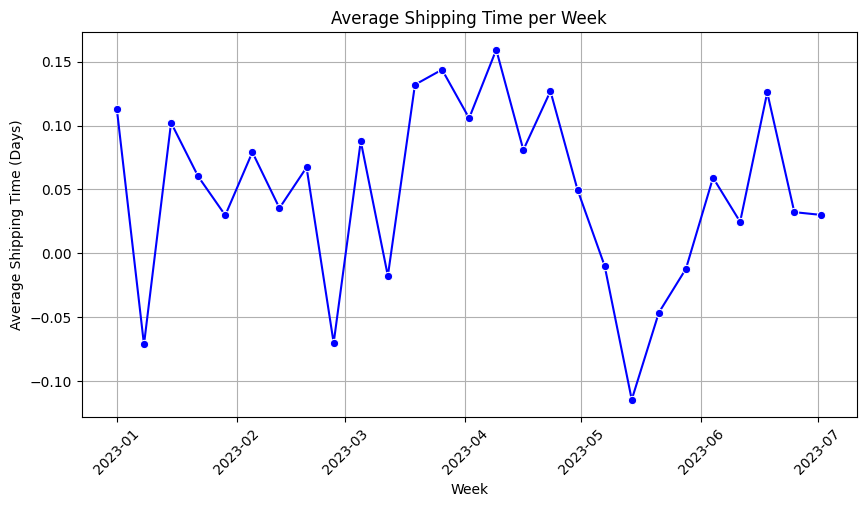

In [ ]:
# Plot average shipping time per week
plt.figure(figsize=(10, 5))
sns.lineplot(data=average_shipping_time_per_week, marker='o', color='b')
plt.title('Average Shipping Time per Week')
plt.xlabel('Week')
plt.ylabel('Average Shipping Time (Days)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

terlihat bahwa terdapat fluktuasi dalam waktu pengiriman rata-rata dari minggu ke minggu. Pada beberapa minggu, average shipping time memiliki nilai positif yang lebih tinggi, sementara pada minggu lain, nilai positifnya lebih rendah. Beberapa minggu juga menunjukkan nilai negatif yang menunjukkan waktu pengiriman lebih cepat dari rata-rata.

In [ ]:
#save data to csv
average_shipping_time_per_week.to_csv('average_shipping_time_per_week.csv', index=False)

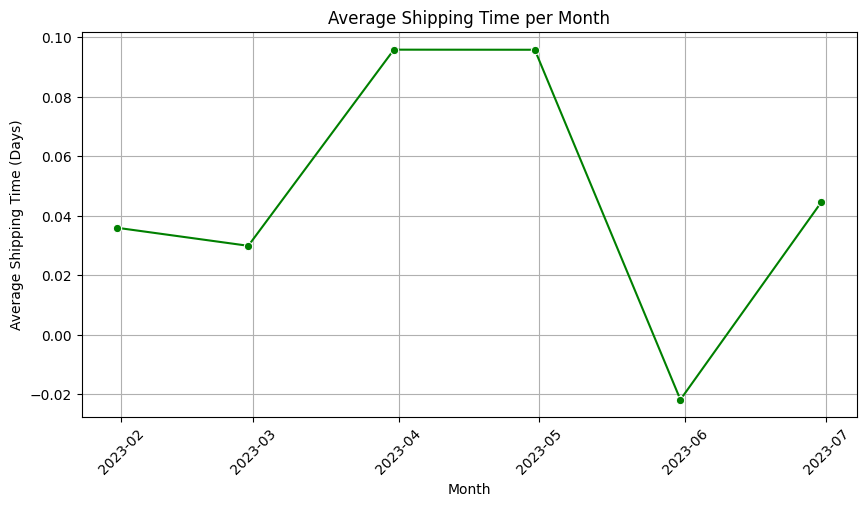

In [ ]:
# Plot average shipping time per month
plt.figure(figsize=(10, 5))
sns.lineplot(data=average_shipping_time_per_month, marker='o', color='g')
plt.title('Average Shipping Time per Month')
plt.xlabel('Month')
plt.ylabel('Average Shipping Time (Days)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

pada bulan april dan mei terdapat jumlah pengiriman yg banyak dari pada bulan lainnya. dnan paling rendah ada di bulan juni yg memiliki jumlah pegiriman sedikit atau mungkin tidak ada pengiriman

In [ ]:
# Convert column to datetime data type
order_items['created_at'] = pd.to_datetime(order_items['created_at'])
order_items.set_index('created_at', inplace=True)

In [ ]:
# Group order_items
items_sold_by_day_of_week = order_items.groupby(order_items.index.day_name())['id'].count()

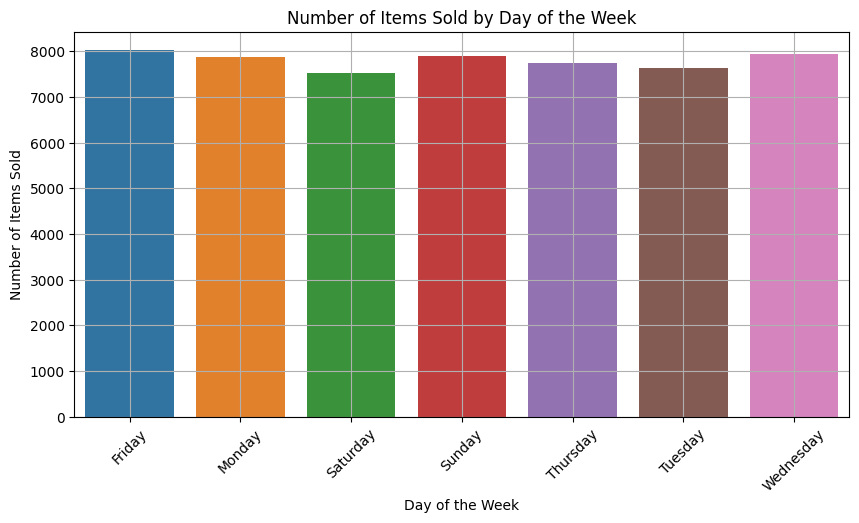

In [ ]:
# Plot the number of items sold by day of the week
plt.figure(figsize=(10, 5))
sns.barplot(x=items_sold_by_day_of_week.index, y=items_sold_by_day_of_week.values)
plt.title('Number of Items Sold by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Items Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

pembelian terbanyak ada di hari jum'at dan hari rabu, sedagkan penjualan terendah berada di hari sabtu

In [ ]:
# Group order_items
orders_by_month = order_items.groupby(order_items.index.month)['id'].count()

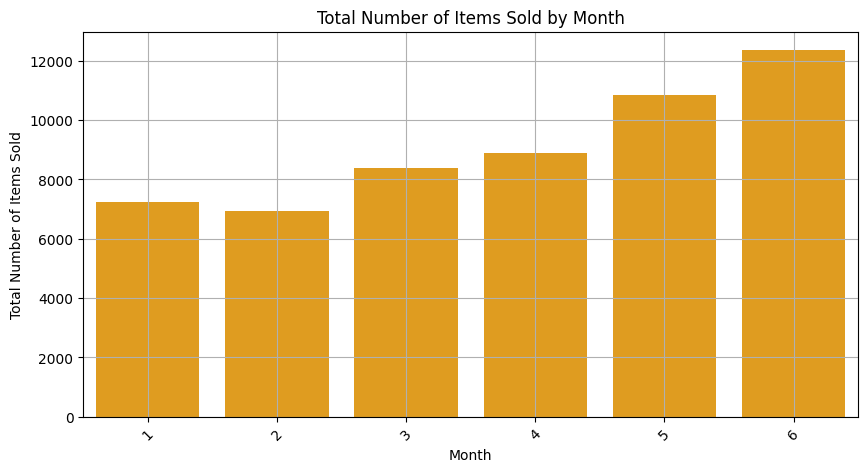

In [ ]:
# Plot total number of items sold by month
plt.figure(figsize=(10, 5))
sns.barplot(x=orders_by_month.index, y=orders_by_month.values, color='orange')
plt.title('Total Number of Items Sold by Month')
plt.xlabel('Month')
plt.ylabel('Total Number of Items Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

pada Q2 dibulan juni trdapat kenaikan penjualan produk, dan pada Q1 bulan februari memiliki produk terjual paling rendah

# 5 - Data Cleaning


In [ ]:
# view data duplication
dist_centers.duplicated().sum()

0

In [ ]:
# view data duplication
invent_items.duplicated().sum()

0

In [ ]:
# view data duplication
products.duplicated().sum()

0

In [ ]:
# view data duplication
orders.duplicated().sum()

0

In [ ]:
# detect missing value
dist_centers.isnull().sum()

id           0
name         0
latitude     0
longitude    0
dtype: int64

In [ ]:
# detect missing value
invent_items.isnull().sum()

id                                    0
product_id                            0
created_at                            0
sold_at                           42858
cost                                  0
product_category                      0
product_name                          7
product_brand                        92
product_retail_price                  0
product_department                    0
product_sku                           0
product_distribution_center_id        0
dtype: int64

In [ ]:
# detect missing value
order_items.isnull().sum()

id                       0
order_id                 0
user_id                  0
product_id               0
inventory_item_id        0
status                   0
shipped_at           19351
delivered_at         35564
returned_at          48992
sale_price               0
shipping_time        19351
dtype: int64

In [ ]:
# detect missing value
products.isnull().sum()

id                         0
cost                       0
category                   0
name                       2
brand                     24
retail_price               0
department                 0
sku                        0
distribution_center_id     0
dtype: int64

In [ ]:
# detect missing value
orders.isnull().sum()

order_id            0
user_id             0
status              0
gender              0
created_at          0
returned_at     33857
shipped_at      13421
delivered_at    24487
num_of_item         0
dtype: int64

In [ ]:
# delete missing value
invent_items.dropna(inplace=True)
order_items.dropna(inplace=True)
products.dropna(inplace=True)
orders.dropna(inplace=True)

# 6 - Handling Outlier

In [ ]:
# handle outliers using IQR method
def handle_outliers_iqr(data):
    numeric_columns = data.select_dtypes(include=[float, int]).columns
    for col in numeric_columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[col] = data[col].apply(lambda x: x if (x >= lower_bound) and (x <= upper_bound) else None)
    return data

In [ ]:
# Handle outliers for all datasets
dist_centers = handle_outliers_iqr(dist_centers)
invent_items = handle_outliers_iqr(invent_items)
order_items = handle_outliers_iqr(order_items)
products = handle_outliers_iqr(products)
orders = handle_outliers_iqr(orders)

# 7 - Uji Statistik

In [ ]:
# Convert the datetime
q1_start = pd.to_datetime('2023-01-01', utc=True)
q1_end = pd.to_datetime('2023-03-31', utc=True)
q2_start = pd.to_datetime('2023-04-01', utc=True)
q2_end = pd.to_datetime('2023-06-30', utc=True)

In [ ]:
# Filter data for Q1 and Q2 in 2023
q1_order_items = order_items[(order_items['shipped_at'] >= q1_start) & (order_items['shipped_at'] <= q1_end)]
q2_order_items = order_items[(order_items['shipped_at'] >= q2_start) & (order_items['shipped_at'] <= q2_end)]

In [ ]:
# Calculate average shipping time for Q1 and Q2
average_shipping_time_q1 = q1_order_items['shipping_time'].mean()
average_shipping_time_q2 = q2_order_items['shipping_time'].mean()

In [ ]:
# Perform t-test to compare average shipping time in Q1 and Q2
t_statistic, p_value = stats.ttest_ind(q1_order_items['shipping_time'], q2_order_items['shipping_time'], equal_var=False)

In [ ]:
# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in average shipping time between Q1 and Q2.")
    if average_shipping_time_q1 < average_shipping_time_q2:
        print("Average shipping time in Q2 is longer than Q1.")
    else:
        print("Average shipping time in Q1 is longer than Q2.")
else:
    print("There is no significant difference in average shipping time between Q1 and Q2.")

There is no significant difference in average shipping time between Q1 and Q2.


kesimpulannya adalah tidak ada perbedaan signifikan dalam waktu pengiriman rata-rata antara Q1 dan Q2 di tahun 2023

# 8 - Overall Analysis

- Tidak terdapat perbedaan signifikan dalam waktu pengiriman rata-rata antara Q1 dan Q2. Waktu pengiriman rata-rata sekitar 1 hari 11 jam 49 menit di Q1 dan 1 hari 11 jam 59 menit di Q2.
- Jumlah total barang yang terjual di Q1 lebih rendah daripada Q2. Ada potensi perbedaan dalam popularitas produk yang menyebabkan perbedaan dalam penjualan antara kategori produk di Q1 dan Q2.
- Terjadi peningkatan jumlah pesanan dari pelanggan di Q2 dibandingkan Q1. Ada perbedaan tren pembelian antara pelanggan pria dan wanita, dengan pelanggan wanita memiliki peningkatan pesanan yang lebih signifikan.
- Tidak terdapat tren mingguan atau bulanan yang jelas dalam waktu pengiriman produk.
- Tidak terdapat pola penjualan tertentu yang berkorelasi dengan hari atau bulan tertentu.

Saran bisnis :     
- Menyadari adanya perbedaan dalam penjualan antara Q1 dan Q2, perusahaan perlu melakukan optimasi persediaan barang. Analisis lebih lanjut terhadap tren penjualan produk tertentu dapat membantu dalam mengelola stok dengan lebih efisien dan menghindari terjadinya kelebihan atau kekurangan persediaan.
- Berdasarkan analisis kategori produk yang sering dikirimkan dan terjual, perusahaan dapat berfokus pada inovasi produk yang paling diminati oleh pelanggan. Selain itu, strategi promosi yang tepat dapat membantu dalam meningkatkan daya tarik produk dan mempengaruhi keputusan pembelian pelanggan.